![](ITD.png)
    
# Inteligencia Artificial

## Arboles de desición Dataset COVID-19
## Docente:

### Rodriguez Rivas Jose Gabriel
## Alumno:

### Jose Guadalupe Calderon Perez

### Importar y preparar los datos para el modelo de árbol de decisiones

In [1]:
import pandas as pd
Covid = pd.read_csv('200723COVID19MEXICO.csv',  encoding= 'unicode_escape')

In [2]:
Covid.head(5)

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-07-23,1162e9,2,4,9,2,20,9,2,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
1,2020-07-23,0e50ac,2,4,9,2,9,9,5,2,...,2,1,2,2,99,1,99,MÃ©xico,99,2
2,2020-07-23,1dd91c,2,4,8,1,8,8,37,2,...,2,1,2,2,99,1,99,MÃ©xico,99,2
3,2020-07-23,1ad302,2,4,30,1,30,30,44,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
4,2020-07-23,1dd6f1,2,3,15,2,15,15,106,2,...,2,2,2,2,1,1,99,MÃ©xico,99,2


In [3]:
len(Covid)

879608

In [4]:
Covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879608 entries, 0 to 879607
Data columns (total 35 columns):
FECHA_ACTUALIZACION    879608 non-null object
ID_REGISTRO            879608 non-null object
ORIGEN                 879608 non-null int64
SECTOR                 879608 non-null int64
ENTIDAD_UM             879608 non-null int64
SEXO                   879608 non-null int64
ENTIDAD_NAC            879608 non-null int64
ENTIDAD_RES            879608 non-null int64
MUNICIPIO_RES          879608 non-null int64
TIPO_PACIENTE          879608 non-null int64
FECHA_INGRESO          879608 non-null object
FECHA_SINTOMAS         879608 non-null object
FECHA_DEF              879608 non-null object
INTUBADO               879608 non-null int64
NEUMONIA               879608 non-null int64
EDAD                   879608 non-null int64
NACIONALIDAD           879608 non-null int64
EMBARAZO               879608 non-null int64
HABLA_LENGUA_INDIG     879608 non-null int64
DIABETES               879608

In [5]:
Covid['Sobrevivio'] = Covid['FECHA_DEF'].apply(lambda toLabel: 0 if toLabel =='9999-99-99' else 1)

In [6]:
Covid.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,Sobrevivio
0,2020-07-23,1162e9,2,4,9,2,20,9,2,1,...,2,2,2,99,1,99,MÃ©xico,99,97,0
1,2020-07-23,0e50ac,2,4,9,2,9,9,5,2,...,1,2,2,99,1,99,MÃ©xico,99,2,0
2,2020-07-23,1dd91c,2,4,8,1,8,8,37,2,...,1,2,2,99,1,99,MÃ©xico,99,2,1
3,2020-07-23,1ad302,2,4,30,1,30,30,44,1,...,2,2,2,99,1,99,MÃ©xico,99,97,0
4,2020-07-23,1dd6f1,2,3,15,2,15,15,106,2,...,2,2,2,1,1,99,MÃ©xico,99,2,0


### Entrenar y calificar el modelo del árbol de decisiones.
### Considerando las variables: UCI, NEUMONIA E INTUBADO

In [7]:
y_target = Covid["Sobrevivio"].values

In [8]:
columns = ["SEXO", "INTUBADO", "NEUMONIA", "EDAD", "EMBARAZO","DIABETES","EPOC","ASMA","INMUSUPR","HIPERTENSION","CARDIOVASCULAR","OBESIDAD","RENAL_CRONICA","TABAQUISMO","UCI"]
X_input = Covid[list(columns)].values

In [9]:
from sklearn import tree

clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)

clf_train = clf_train.fit(X_input, y_target)

In [10]:
clf_train.score(X_input,y_target)

0.9433054269629199

### Visualizar el árbol

In [11]:
Resultado = ['No sobrevivie','Sobrevivie']

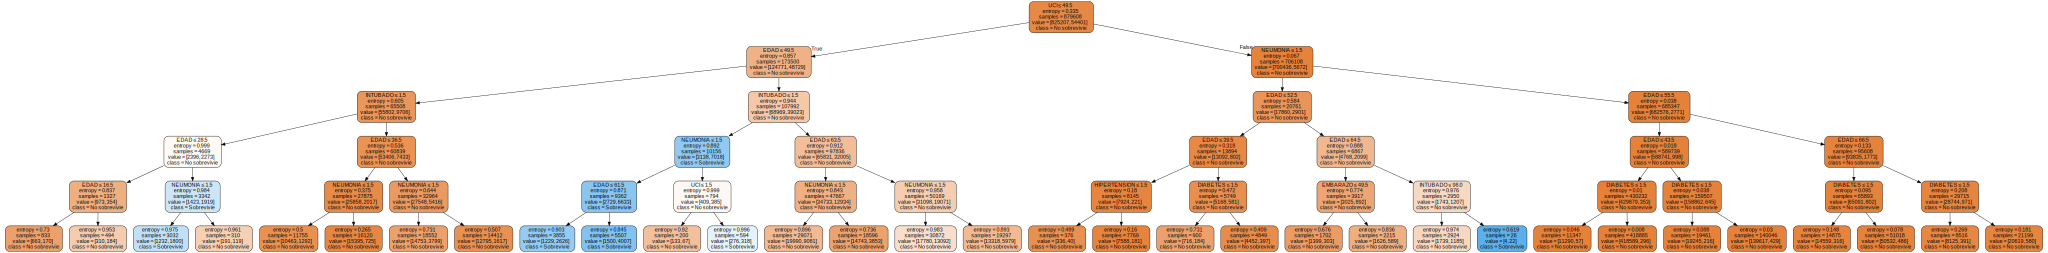

In [12]:
import graphviz
dot_data = tree.export_graphviz(clf_train, out_file=None,
                                class_names = Resultado,
                                feature_names = columns,
                                filled = True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('CovidTree', format='png')
graph

In [13]:
import sklearn
with open("Covid.dot", 'w') as f:
  f = tree.export_graphviz(clf_train, out_file=f, feature_names=columns, class_names = Resultado)

In [14]:
!dot -Tpng Covid.dot -o Covid.png

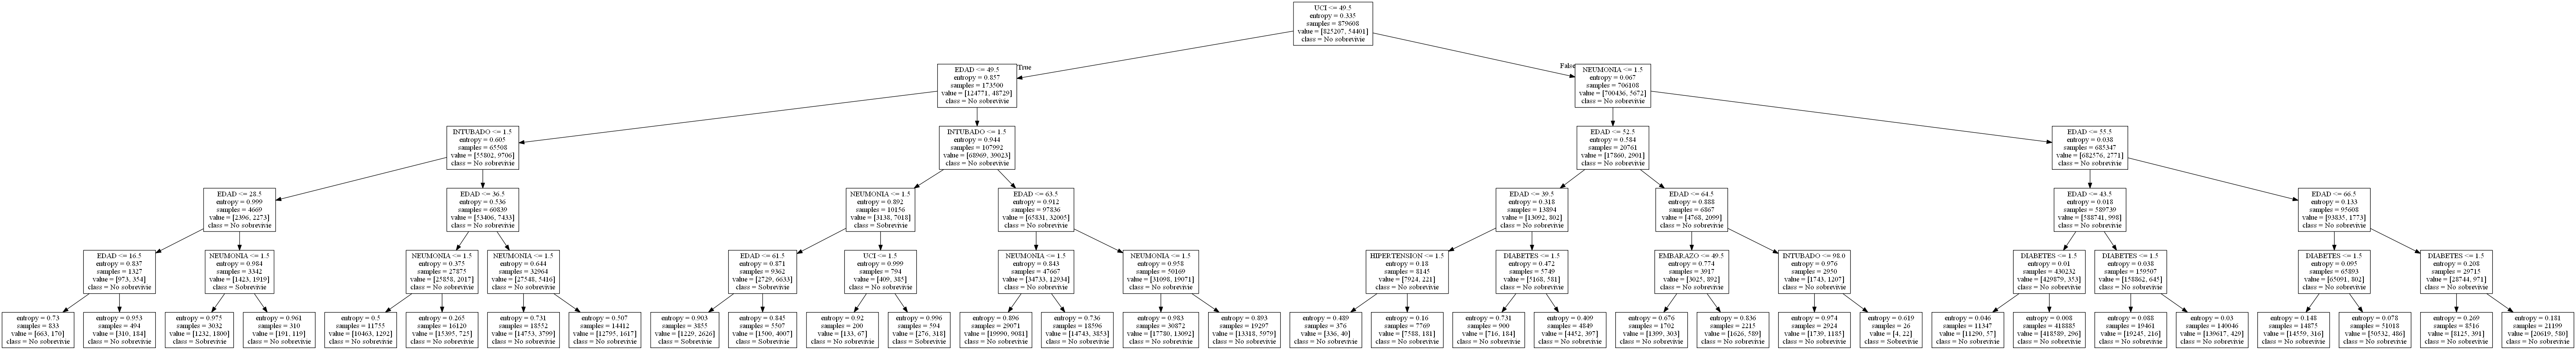

In [15]:
from IPython.display import Image
Image("Covid.png")

### Entrenar y calificar el modelo del árbol de decisiones.
### Sin tomar las variables: UCI, NEUMONIA E INTUBADO

In [16]:
y_target = Covid["Sobrevivio"].values

In [17]:
columns = ["SEXO", "EDAD", "EMBARAZO","DIABETES","EPOC","ASMA","INMUSUPR","HIPERTENSION","CARDIOVASCULAR","OBESIDAD","TABAQUISMO","RENAL_CRONICA"]
X_input = Covid[list(columns)].values

In [18]:
from sklearn import tree
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)
clf_train = clf_train.fit(X_input, y_target)

In [19]:
clf_train.score(X_input,y_target)

0.9381531318496421

### Visualizar el árbol 2.0

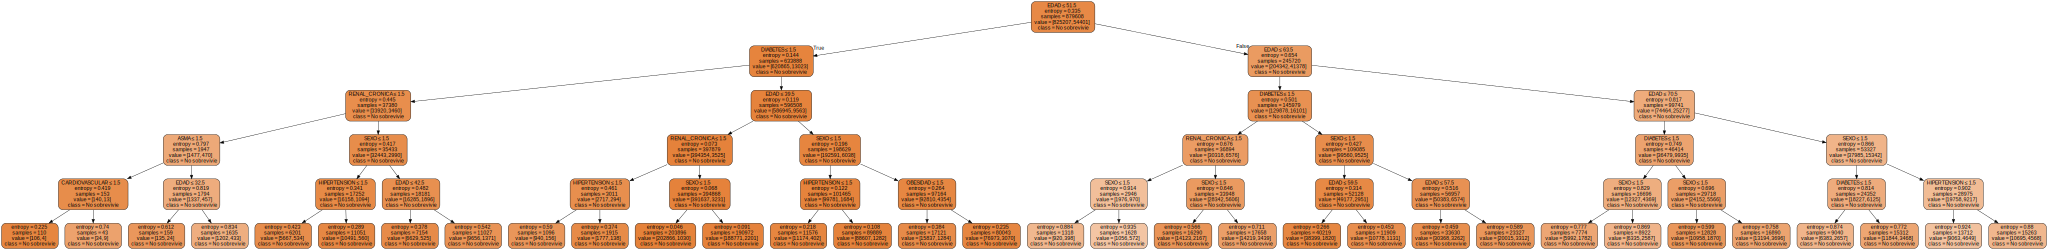

In [20]:
import graphviz
dot_data = tree.export_graphviz(clf_train, out_file=None,
                                class_names = Resultado,
                                feature_names = columns,
                                filled = True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('CovidTree2.0', format='png')
graph

In [21]:
import sklearn
with open("Covid2.dot", 'w') as f:
  f = tree.export_graphviz(clf_train, out_file=f, feature_names=columns, class_names = Resultado)

In [22]:
!dot -Tpng Covid2.dot -o Covid2.png

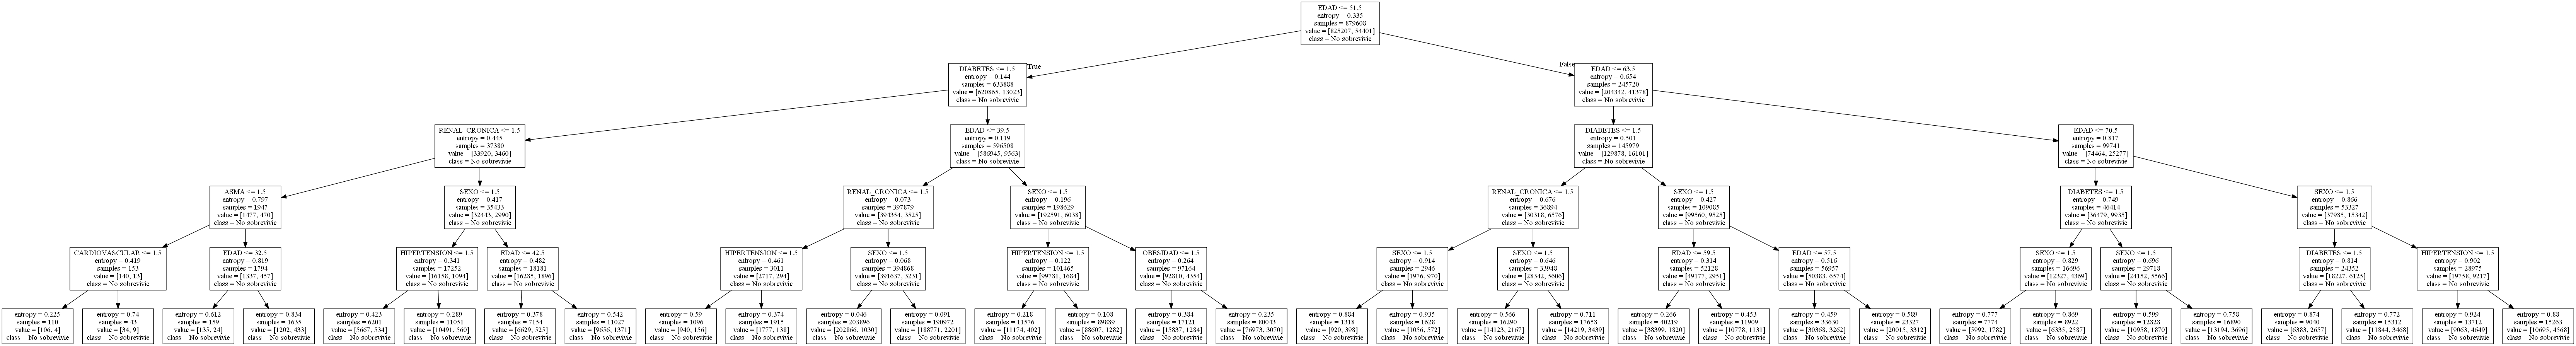

In [23]:
from IPython.display import Image
Image("Covid2.png")

### Conclusiones

#### Si comparamos un árbol de decisión con otro a simple vista se aprecia que al remover las variables de CUI (cuidados intensivos), Neumonía e Intubado en cualquiera de los grupos se tiene una alta probabilidad de no sobrevivir al COVID19 y más si la edad oscila entre los 40 y 63 años de edad, ya para estas respectivas edades el factor de tener o no tener diabetes es más alto cuando se da en las personas mayores de 52 años. 

#### Ahora si analizamos primer árbol donde tomamos encuentras todas las variables existen grupos donde se refleja la posibilidad de sobrevivir, por ejemplo, personas mayores a los 65 años que presentaron síntomas de neumonía sobrevivieron después de haber sido intubadas. Lo mismo sucede con el caso de las personas que estuvieron en la unidad de cuidados intensivos, donde los fallecidos solo fueron las personas que presentaron síntomas de neumonía, entonces las peronas que presentan neumonia pueden sobrevivir al covid si se les ingresa a la unidad de cuidados intensivos. 
